In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import kagglehub

In [ ]:
! pip install -U imbalanced-learn

In [ ]:
seed = 35
np.random.seed(seed)

# Pull & Pre-process The Dataset

In [ ]:
path = kagglehub.dataset_download("mujtabamatin/air-quality-and-pollution-assessment")
print("Path to dataset files:", path)

files = os.listdir(path)
print("Files in dataset folder:", files)

csv_file = [f for f in files if f.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)
print("csv_path", csv_path)

100%|██████████| 84.1k/84.1k [00:00<00:00, 49.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mujtabamatin/air-quality-and-pollution-assessment/versions/2
Files in dataset folder: ['updated_pollution_dataset.csv']
csv_path /root/.cache/kagglehub/datasets/mujtabamatin/air-quality-and-pollution-assessment/versions/2/updated_pollution_dataset.csv


In [ ]:
my_dataframe = pd.read_csv(csv_path)
my_dataframe.head(10)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,Hazardous
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,Moderate
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor


In [ ]:
# prompt: Using dataframe my_dataframe: Filter Air Quality column only good and poor

# Filter the DataFrame to include only rows where 'Air Quality' is 'Good' or 'Poor'
filtered_df = my_dataframe[my_dataframe['Air Quality'].isin(['Good', 'Poor'])]

# Display the filtered DataFrame (optional)
filtered_df


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,Poor
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,Poor
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,Poor
...,...,...,...,...,...,...,...,...,...,...
4987,26.2,63.4,14.7,21.1,19.1,3.7,1.15,14.2,305,Good
4988,26.5,43.0,18.8,18.4,17.6,2.1,1.08,10.6,426,Good
4992,29.8,56.7,6.8,14.0,23.0,4.5,1.10,11.4,567,Good
4994,31.1,61.0,27.1,31.1,13.0,3.8,0.98,13.4,278,Good


In [ ]:
air_quality_mapping = {'Good': 1, 'Poor': 0}

# Convert the 'Air Quality' column to numerical representation using the mapping
filtered_df['Air Quality'] = filtered_df['Air Quality'].map(air_quality_mapping)


<ipython-input-9-5589986db55f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Air Quality'] = filtered_df['Air Quality'].map(air_quality_mapping)


In [ ]:
feature_columns = ['Temperature', 'Humidity']
label_column = ['Air Quality']

# Extract features and label
features = filtered_df[feature_columns]
labels = filtered_df[label_column]

# Checking and Handling Data imbalance

In [ ]:
filtered_df['Air Quality'] = filtered_df['Air Quality'].map(air_quality_mapping).value_counts

<ipython-input-12-793f58d5b1d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Air Quality'] = filtered_df['Air Quality'].map(air_quality_mapping).value_counts


<Axes: ylabel='count'>

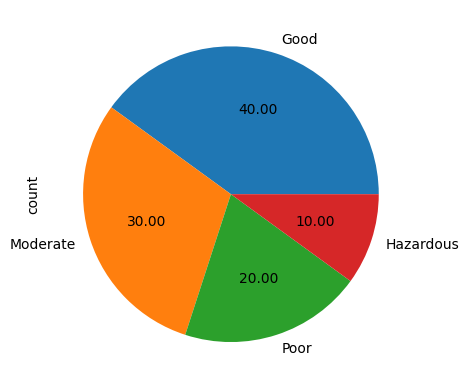

In [ ]:
my_dataframe['Air Quality'].value_counts().plot.pie(autopct='%.2f')

## Random Undersampling

"not majority" = resample all classes, but not the majority class.

You can put the value of: 1, in-place of the "not minority"

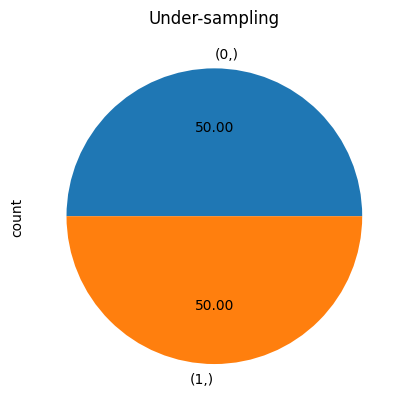

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(features, labels)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [ ]:
y_res.value_counts()

,count
Air Quality,
0,1000
1,1000


## Random Oversampling

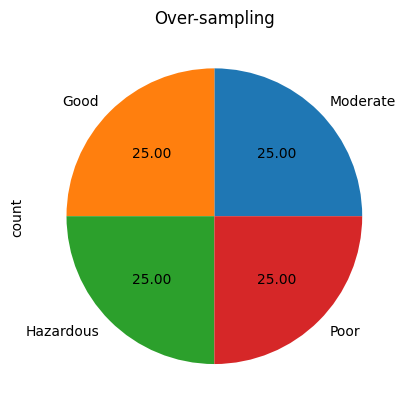

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

features = my_dataframe.drop('Air Quality', axis=1)
labels = my_dataframe['Air Quality']

ros = RandomOverSampler(sampling_strategy='auto')

X_res, y_res = ros.fit_resample(features, labels)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
plt.show()

In [ ]:
y_res.value_counts()

,count
Air Quality,
Moderate,2000
Good,2000
Hazardous,2000
Poor,2000
